In [163]:
# Importando o pandas, matplotlib e lendo o arquivo .csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds_titanic = pd.read_csv('titanic-data-6.csv')

# Verificando o estado dos dados e as colunas disponíveis no dataset
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [164]:
# Explorando uma primeira fatia dos dados contidos no dataset
ds_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [165]:
# Usando a média para completar a coluna de idade (Age)
mean_age = ds_titanic['Age'].mean()
ds_titanic['Age'].fillna(mean_age, inplace=True)

# Verificando se a modificação funcionou
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [166]:
# Apagando as colunas "Cabin", "Embarked" e "Ticket", já que elas não são interessantes para nossa análise
ds_titanic.drop(['Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)



In [167]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [168]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [169]:
# Renomeando o nome das colunas para dar maior clareza na hora da análise

ds_titanic.rename(index=str, 
                  columns={"Pclass": "Ticket_Class", 
                           "SibSp": "Number_siblings_spouses", 
                           "Parch": "Number_parent_children"}, 
                  inplace=True)

In [170]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.head()

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,Number_siblings_spouses,Number_parent_children,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [171]:
# Verificando se há dados duplicados
sum(ds_titanic.duplicated())

0

In [172]:
'''
A ideia é verificar se, dentre o dataset obtido, houve um gênero que se destacou em relação aos sobreviventes.

Como sabemos, tradicionalmente mulheres e crianças possuem preferência em resgate. Então a análise deve mostra um
índice maior de sobreviventes do sexo feminino.
'''

# Descobrindo o total de mortos e sobreviventes para cada gênero
total_male_survived = ds_titanic.query('Sex == "male" and Survived == 1')['Sex'].count()
total_male_died = ds_titanic.query('Sex == "male" and Survived == 0')['Sex'].count()
total_female_survived = ds_titanic.query('Sex == "female" and Survived == 1')['Sex'].count()
total_female_died = ds_titanic.query('Sex == "female" and Survived == 0')['Sex'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_passenger_values = [total_male_survived, total_male_died, total_female_survived, total_female_died]

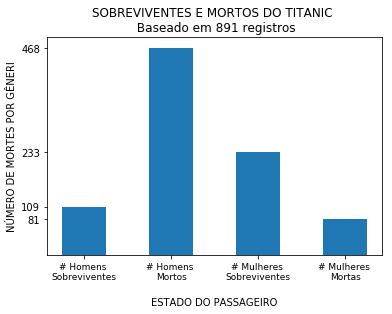

In [173]:
# Definindo as legendas para cada item, além de seu posicionamento no gráfico
passenger_labels = ['# Homens \nSobreviventes', '# Homens \nMortos', '# Mulheres \nSobreviventes', '# Mulheres \nMortas']
passenger_labels_pos = [0,4,8,12]

# Desenhando o gráfico para visualizar os sobreviventes e mortos de cada gênero
plt.bar(passenger_labels_pos, total_passenger_values, width=2)
plt.xticks(passenger_labels_pos, passenger_labels, fontsize=9)
plt.yticks(total_passenger_values)
plt.xlabel('\nESTADO DO PASSAGEIRO')
plt.ylabel('NÚMERO DE MORTES POR GÊNERI')
plt.title('SOBREVIVENTES E MORTOS DO TITANIC \n Baseado em ' + str(total_male_survived +
                                                                      total_male_died +
                                                                      total_female_survived +
                                                                      total_female_died) + ' registros')
plt.show()

In [174]:
'''
A primeira análise faz sentido. Mulheres têm prioridade no salvamento e, por isso, sobreviveram mais ao desastre
- pelo menos no trecho analisado. Foram 34% de sobreviventes mulheres (233) e 17% de sobreviventes homens (109) no 
conjunto de dados fornecido e proporcionalmente à quantidade analisada.

Agora vamos avaliar a taxa .
'''
# Descobrindo o total de crianças que sobreviveram ou não
total_children_survived = ds_titanic.query('Age <= 12.0 and Survived == 1')['Age'].count()
total_children_died = ds_titanic.query('Age <= 12.0 and Survived == 0')['Age'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_children_values = [total_children_survived, total_children_died]

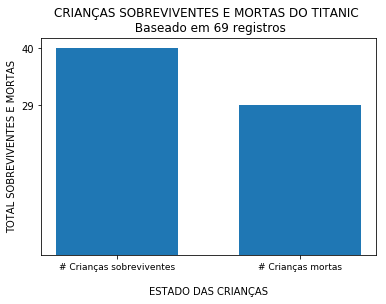

In [175]:
# Definindo as legendas para cada item, além de seu posicionamento no gráfico
children_labels = ['# Crianças sobreviventes', '# Crianças mortas']
children_labels_pos = [0,3]

# Desenhando o gráfico para visualizar os sobreviventes e mortos de cada gênero
plt.bar(children_labels_pos, total_children_values, width=2)
plt.xticks(children_labels_pos, children_labels, fontsize=9)
plt.yticks(total_children_values)
plt.xlabel('\nESTADO DAS CRIANÇAS')
plt.ylabel('TOTAL SOBREVIVENTES E MORTAS')
plt.title('CRIANÇAS SOBREVIVENTES E MORTAS DO TITANIC \n Baseado em ' + str(total_children_survived +
                                                                      total_children_died) + ' registros')
plt.show()

In [176]:
'''
Conforme imaginamos, as crianças tiveram um melhor índice de salvamento, já que possuem prioridade para tal - assim
como as mulheres. Do total de crianças presente nos dados, houveram 58% de sobreviventes (40 crianças) e 42% de mortos
(29 crianças).

Agora vamos ver se houve algum tipo de prioridade entre gêneros de criança.
'''
# Descobrindo o total de mortos e sobreviventes para cada gênero (considerando apenas crianças)
total_boys_survived = ds_titanic.query('Age <= 12.0 and Survived == 1 and Sex == "male"')['Sex'].count()
total_boys_died = ds_titanic.query('Age <= 12.0 and Survived == 0 and Sex == "male"')['Sex'].count()
total_girls_survived = ds_titanic.query('Age <= 12.0 and Survived == 1 and Sex == "female"')['Sex'].count()
total_girls_died = ds_titanic.query('Age <= 12.0 and Survived == 0 and Sex == "female"')['Sex'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_children_values = [total_boys_survived, total_boys_died, total_girls_survived, total_girls_died]

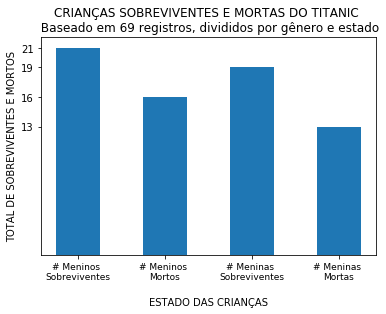

In [177]:
# Definindo as legendas para cada item, além de seu posicionamento no gráfico
children_labels = ['# Meninos \nSobreviventes', '# Meninos \nMortos', '# Meninas \nSobreviventes', '# Meninas \nMortas']
children_labels_pos = [0,4,8,12]

# Desenhando o gráfico para visualizar os sobreviventes e mortos de cada gênero
plt.bar(children_labels_pos, total_children_values, width=2)
plt.xticks(children_labels_pos, children_labels, fontsize=9)
plt.yticks(total_children_values)
plt.xlabel('\nESTADO DAS CRIANÇAS')
plt.ylabel('TOTAL DE SOBREVIVENTES E MORTOS')
plt.title('CRIANÇAS SOBREVIVENTES E MORTAS DO TITANIC \n Baseado em ' + str(total_boys_survived +
                                                                      total_boys_died +
                                                                      total_girls_survived +
                                                                      total_girls_died) + 
                                                                      ' registros, divididos por gênero e estado')
plt.show()

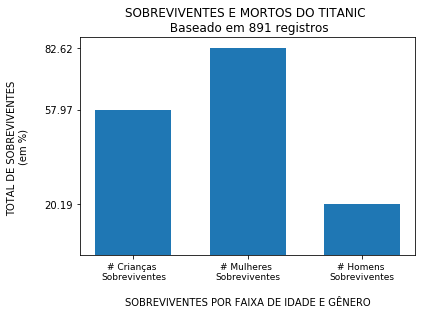

In [178]:
'''
Como pudemos ver, o gênero das crianças não influenciou no salvamento. Dos registros obtidos, 52%
dos meninos sobreviveram e 47% das meninas também sobreviveram - bem próximos na comparação.

Agora temos a capacidade de comparar e visualizar a diferença de sobreviventes entre crianças (independente do sexo),
mulheres e homens (considerando apenas adultos).
'''

# Recuperando o total de crianças, mulheres adultas e homens adultos
total_children = ds_titanic.query('Age <= 12')['Age'].count()
total_female = ds_titanic.query('Age > 12 and Sex == "female"')['Age'].count()
total_male = ds_titanic.query('Age > 12 and Sex == "male"')['Age'].count()

# Descobrindo o percentual de crianças, mulheres e homens que sobreviveram em relação ao total de cada grupo
children_perc = total_children_survived / total_children * 100
male_perc = total_female_survived / total_female * 100
female_perc = total_male_survived / total_male * 100

# Atribuindo os valores obtidos para utilização no gráfico
total_people_values = [children_perc, male_perc, female_perc]

# Definindo as legendas para cada item, além de seu posicionamento no gráfico
people_labels = ['# Crianças \nSobreviventes', '# Mulheres \nSobreviventes', '# Homens \nSobreviventes']
people_labels_pos = [0,3,6]

# Desenhando o gráfico para visualizar os sobreviventes e mortos de cada gênero
plt.bar(people_labels_pos, total_people_values, width=2)
plt.xticks(people_labels_pos, people_labels, fontsize=9)
plt.yticks(total_people_values)
plt.xlabel('\nSOBREVIVENTES POR FAIXA DE IDADE E GÊNERO')
plt.ylabel('TOTAL DE SOBREVIVENTES \n(em %)\n')
plt.title('SOBREVIVENTES E MORTOS DO TITANIC \n Baseado em ' + str(total_male_survived +
                                                                      total_male_died +
                                                                      total_female_survived +
                                                                      total_female_died) + ' registros')
plt.show()

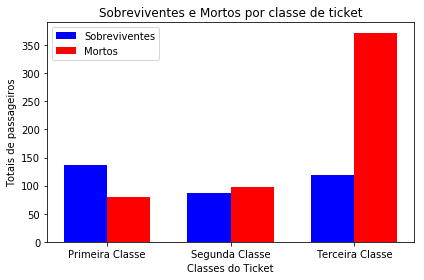

In [183]:
'''
Ou seja: considerando os dados analisados, mulheres adultas tinham um alto índice de sobrevivência (83%), seguidos por 
crianças (independente do sexo, com 58%) e, só então, homens (20%).

Agora vamos analisar (ter apenas uma ideia) se a classe do ticket influenciou no salvamento, já que as cabines mais 
caras poderiam estar em lugares melhores (mesmo que não tenhamos o local dessas cabines).
'''

# Descobrindo o total de sobreviventes por classe
total_survivors_first_class = ds_titanic.query('Ticket_Class == 1 and Survived == 1')['Sex'].count()
total_survivors_second_class = ds_titanic.query('Ticket_Class == 2 and Survived == 1')['Sex'].count()
total_survivors_third_class = ds_titanic.query('Ticket_Class == 3 and Survived == 1')['Sex'].count()

# Criando uma tupla para ser usada no gráfico
total_survivors_by_class = (total_survivors_first_class, 
                            total_survivors_second_class, 
                            total_survivors_third_class)

# Descobrindo o total de mortos por classe
total_deaths_first_class = ds_titanic.query('Ticket_Class == 1 and Survived == 0')['Sex'].count()
total_deaths_second_class = ds_titanic.query('Ticket_Class == 2 and Survived == 0')['Sex'].count()
total_deaths_third_class = ds_titanic.query('Ticket_Class == 3 and Survived == 0')['Sex'].count()

# Criando uma tupla para ser usada no gráfico
total_deaths_by_class = (total_deaths_first_class, 
                         total_deaths_second_class, 
                         total_deaths_third_class)

# Possibilitando o uso de múltiplos subplots para comparar os itens lado a lado
fig, ax = plt.subplots()

# Definindo o index de cada grupo, baseando-se na quantidade de grupos necessários no gráfico (3)
index = np.arange(3)

# Definindo a largura da barra
bar_width = 0.35

# Desenhando cada barra (e seus dados) nas posições definidas no gráfico
ax.bar(index, total_survivors_by_class, bar_width, color='blue',
                label='Sobreviventes')
ax.bar(index + 0.35, total_deaths_by_class, bar_width, color='red',
                label='Mortos')

# Definindo as informações do gráfico para fácil entendimento
ax.set_xlabel('Classes do Ticket')
ax.set_ylabel('Totais de passageiros')
ax.set_title('Sobreviventes e Mortos por classe de ticket')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Primeira Classe', 'Segunda Classe', 'Terceira Classe'))
ax.legend()

# Melhorando o visual do gráfico e gerando ele de fato
fig.tight_layout()
plt.show()

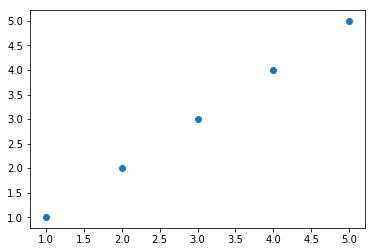

In [113]:
'''
Apesar de não ter uma informação conclusiva, já que não sabemos exatamente onde estavam as cabines dos tickets de
terceira classe, conseguimos pensar em duas situações: (1) passageiros de terceira classe estavam pior posicionados 
ou (2) passageiros de classes maiores tinham prioridade no salvamento, justamente pela sua posição social na sociedade.

Outro ponto interessante é que - nesse conjunto de dados - a quantidade total de passageiros de terceira classe é bem
maior do que as outras classes.

Agora vamos analisar se passageiros que viajavam sozinhos tiveram mais chance na sobrevivência do que os que estavam
acompanhados pela família e tinham mais pessoas para proteger.
'''